In [142]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pylab import rcParams
from datetime import datetime
rcParams['figure.figsize'] = 10, 10
%matplotlib inline
plt.style.use('fivethirtyeight')

In [143]:
sales = pd.read_csv('sales-cars.csv')
sales.head(2)

,Month,Sales
0,2016-01,266
1,2016-02,146


In [144]:
# def parser(x):
#     return datetime.strptime(x,'%Y-%m')

# sales = pd.read_csv('sales-cars.csv', parse_dates=[0] ,date_parser=parser)
sales['Month'] = pd.to_datetime(sales['Month'], yearfirst=True, infer_datetime_format= True)
index_dataset = sales.set_index('Month')


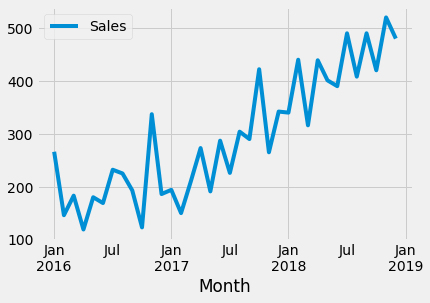

In [145]:
index_dataset.plot()

# Making data stationary

### Rolling mean and standard deviation

In [146]:
roll_mean = index_dataset.rolling(window = 13).mean()
roll_std = index_dataset.rolling(window = 13).std()


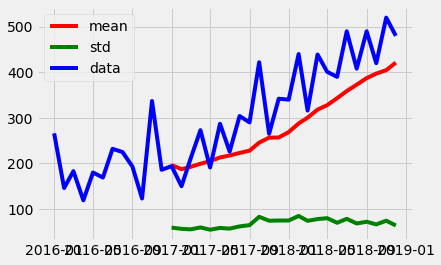

In [147]:
mean = plt.plot(roll_mean, 'r', label = 'mean')
std = plt.plot(roll_std, 'g', label = 'std')
data = plt.plot(index_dataset, 'b', label = 'data')
plt.legend(loc = 'best')


### dicifuller test

In [148]:
from statsmodels.tsa.stattools import adfuller as ad
dc_test = ad(index_dataset['Sales'], autolag= 'AIC')
df_output = pd.Series(dc_test[0:4], index=['test_statistics', 'p-value', 'lags_used', 'no.of observations used'])
for key, value in dc_test[4].items():
    df_output['critical value %s'%key] = value
df_output

test_statistics             1.636883
p-value                     0.997964
lags_used                  10.000000
no.of observations used    25.000000
critical value 1%          -3.723863
critical value 5%          -2.986489
critical value 10%         -2.632800
dtype: float64

In [149]:
dc_test[4].items()

dict_items([('1%', -3.7238633119999998), ('5%', -2.98648896), ('10%', -2.6328004)])

# converting series into stationarity

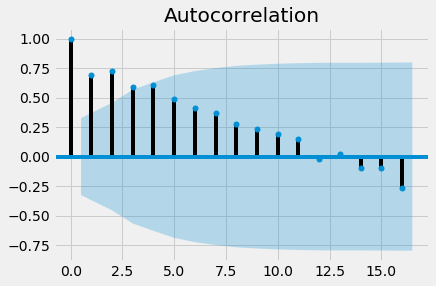

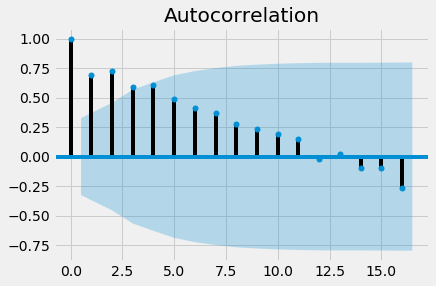

In [150]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(index_dataset)

### here we can see that autocorrelation is decaying slowly in above fig means stationarity is very less

### #integrated of order 1  ie d one of the parameters of arima


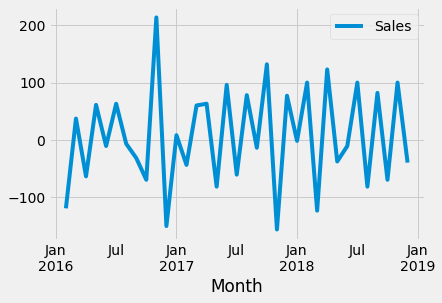

In [151]:
sales_diff1 = index_dataset.diff(periods=1).dropna()
sales_diff1.plot()

In [152]:
sales_diff1.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


### here in below fig autocorrelation falls at high rate means increase in stationarity

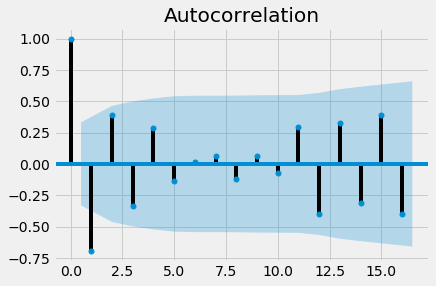

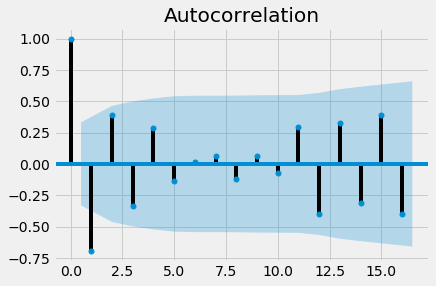

In [153]:
plot_acf(sales_diff1)

## rolling  mean test on index_diff data 

#### don't get confused between sales_diff and index_diff both are same

In [154]:
roll_mean_diff = sales_diff1.rolling(window = 13).mean()
roll_std_diff = sales_diff1.rolling(window = 13).std()

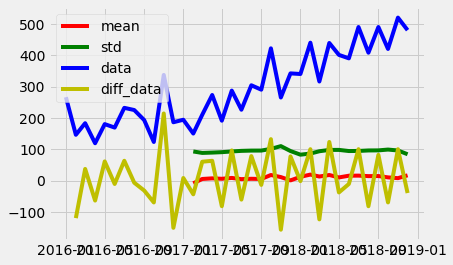

In [155]:
plt.plot(roll_mean_diff, 'r', label = 'mean')
plt.plot(roll_std_diff, 'g', label = 'std')
plt.plot(index_dataset, 'b', label = 'data')
plt.plot(sales_diff1, 'y', label = 'diff_data')
plt.legend(loc = 'best')

## dicifuller test application on diff data

In [156]:
from statsmodels.tsa.stattools import adfuller as ad
dc_test_diff = ad(sales_diff1['Sales'], autolag= 'AIC')
df_output_diff = pd.Series(dc_test_diff[0:4], index=['test_statistics', 'p-value', 'lags_used', 'no.of observations used'])
for key, value in dc_test_diff[4].items():
    df_output_diff['critical value %s'%key] = value
df_output_diff

test_statistics            -1.383201
p-value                     0.590303
lags_used                  10.000000
no.of observations used    24.000000
critical value 1%          -3.737709
critical value 5%          -2.992216
critical value 10%         -2.635747
dtype: float64

## plotting simpledata_logscale ie taking log of simple data 

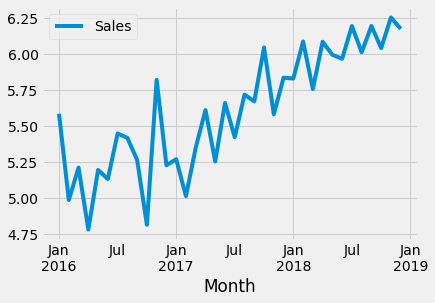

In [157]:
index_dataset_logscale = np.log(index_dataset)
index_dataset_logscale.plot()

##### we can also apply dicifuller test to simpledata_logscale data  iam not applysing that here 

## taking diff  to log data 

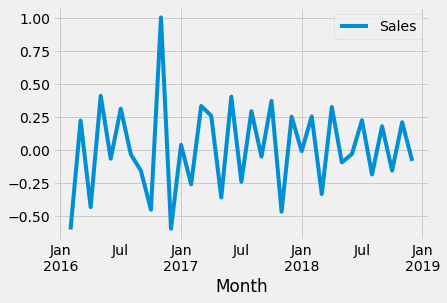

In [158]:
index_dataset_logscale_diff =(index_dataset_logscale.diff(periods=1).dropna())
index_dataset_logscale_diff.plot()

##### applying dicifuller test to index_dataset_logscale_diff  and see the changes in p value

In [159]:
# from statsmodels.tsa.stattools import adfuller as ad
dc_test_log_diff = ad(index_dataset_logscale_diff['Sales'], autolag= 'AIC')
df_output_log_diff = pd.Series(dc_test_log_diff[0:4], index=['test_statistics', 'p-value', 'lags_used', 'no.of observations used'])
for key, value in dc_test_log_diff[4].items():
    df_output_log_diff['critical value %s'%key] = value
df_output_log_diff

test_statistics            -1.853344
p-value                     0.354318
lags_used                  10.000000
no.of observations used    24.000000
critical value 1%          -3.737709
critical value 5%          -2.992216
critical value 10%         -2.635747
dtype: float64

# Moving average  rolling mean of log data 

In [160]:
mvavg = index_dataset_logscale.rolling(window=13).mean()
mstd = index_dataset_logscale.rolling(window=13).std()
mvavg.head(18)

,Sales
Month,
2016-01-01,NaN
2016-02-01,NaN
2016-03-01,NaN
2016-04-01,NaN
2016-05-01,NaN
2016-06-01,NaN
2016-07-01,NaN
2016-08-01,NaN
2016-09-01,NaN


##### simple log data minus moving average

In [161]:
simplelog_minus_mvavg = index_dataset_logscale - mvavg
simplelog_minus_mvavg.dropna(inplace = True)
simplelog_minus_mvavg.head()

,Sales
Month,
2017-01-01,0.027091
2017-02-01,-0.186065
2017-03-01,0.122445
2017-04-01,0.354042
2017-05-01,-0.039553


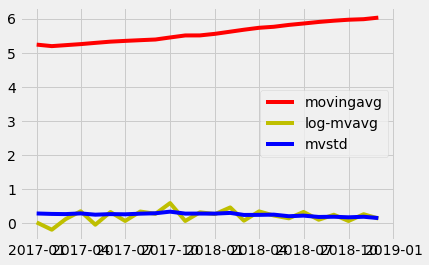

In [162]:
plt.plot(mvavg,'r', label = 'movingavg')
plt.plot(simplelog_minus_mvavg, 'y', label ='log-mvavg' )
plt.plot(mstd, 'b', label = 'mvstd')
plt.legend(loc = 'best')

### Diccifullar test to simplelog minus mvavg 

In [163]:
dc_test_log_mv = ad(simplelog_minus_mvavg['Sales'], autolag= 'AIC')
df_output_log_mv = pd.Series(dc_test_log_mv[0:4], index=['test_statistics', 'p-value', 'lags_used', 'no.of observations used'])
for key, value in dc_test_log_diff[4].items():
    df_output_log_mv['critical value %s'%key] = value
df_output_log_mv

test_statistics            -1.993419
p-value                     0.289466
lags_used                   8.000000
no.of observations used    15.000000
critical value 1%          -3.737709
critical value 5%          -2.992216
critical value 10%         -2.635747
dtype: float64

### diccifular test to logdiff minud mvavg

In [164]:
difflog_minus_mvavg = index_dataset_logscale_diff - mvavg
difflog_minus_mvavg.dropna(inplace = True)
difflog_minus_mvavg.head()

,Sales
Month,
2017-01-01,-5.198655
2017-02-01,-5.453923
2017-03-01,-4.888190
2017-04-01,-4.993066
2017-05-01,-5.649025


In [165]:
dc_test_log_diff_mv = ad(difflog_minus_mvavg['Sales'], autolag= 'AIC')
df_output_log_diff_mv = pd.Series(dc_test_log_diff_mv[0:4], index=['test_statistics', 'p-value', 'lags_used', 'no.of observations used'])
for key, value in dc_test_log_diff[4].items():
    df_output_log_diff_mv['critical value %s'%key] = value
df_output_log_diff_mv

test_statistics            -0.982565
p-value                     0.759570
lags_used                   9.000000
no.of observations used    14.000000
critical value 1%          -3.737709
critical value 5%          -2.992216
critical value 10%         -2.635747
dtype: float64

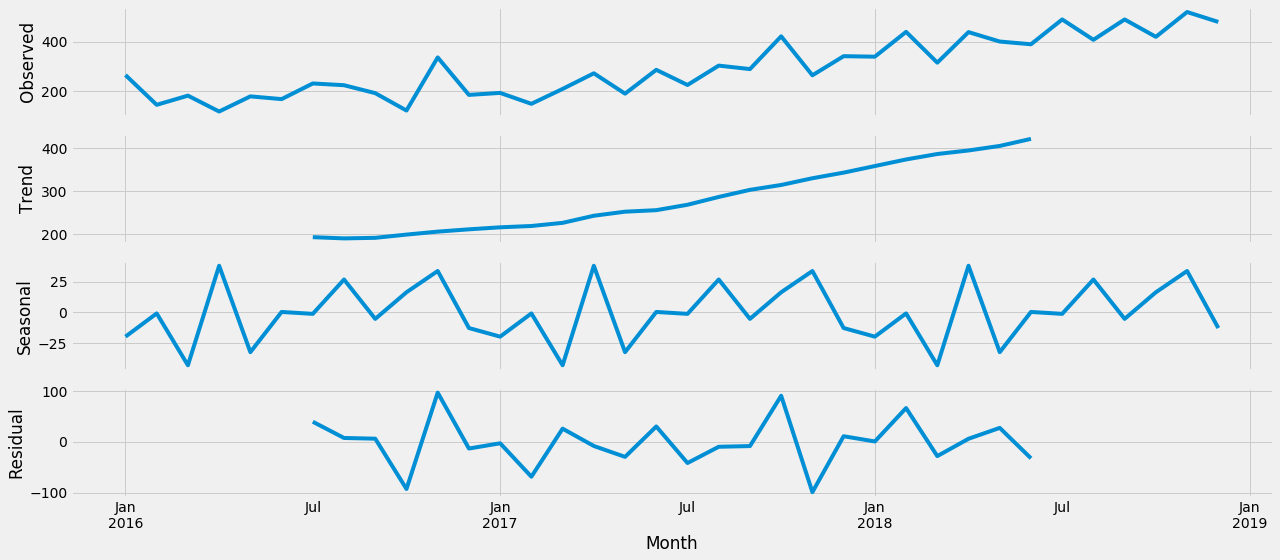

In [170]:
rcParams['figure.figsize'] = 18, 8
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(index_dataset)
fig = decomposition.plot()

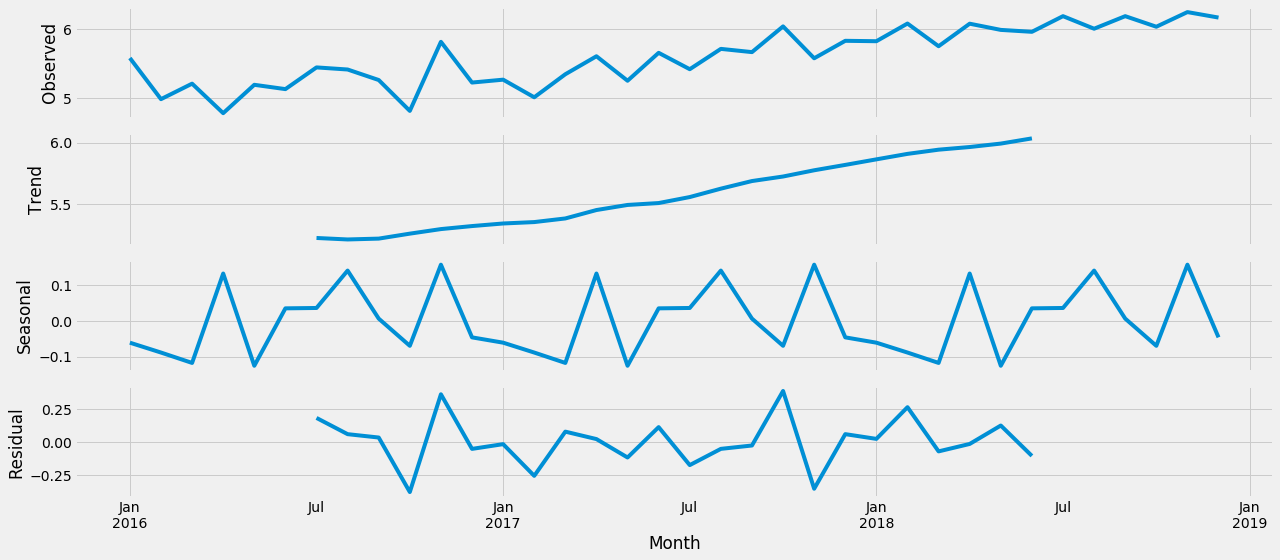

In [171]:
rcParams['figure.figsize'] = 18, 8
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(index_dataset_logscale)
fig = decomposition.plot()

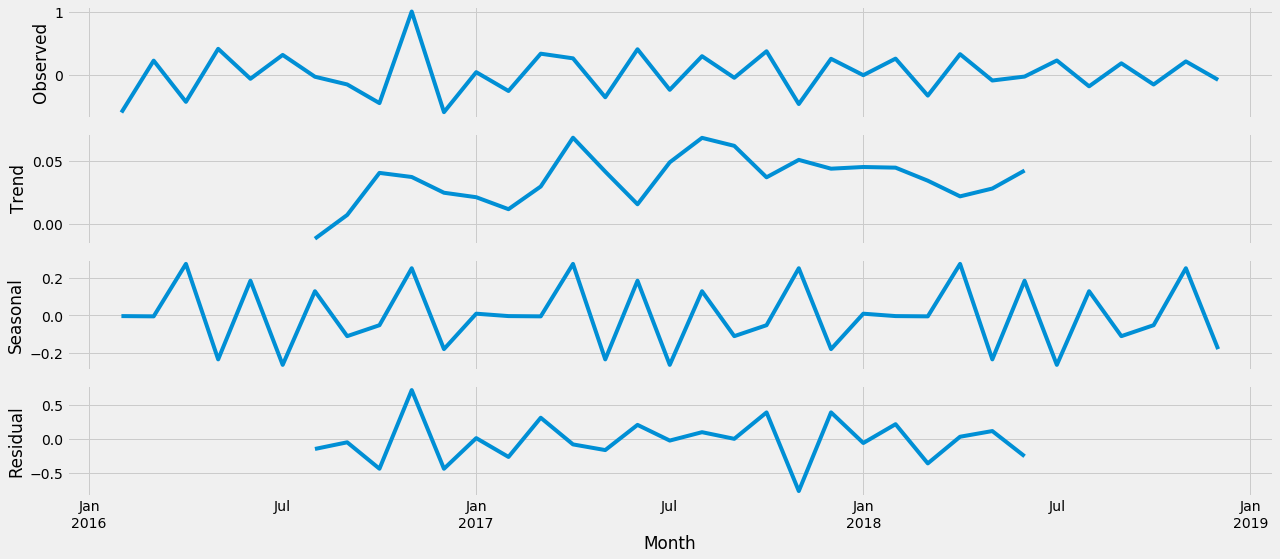

In [172]:
rcParams['figure.figsize'] = 18, 8
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(index_dataset_logscale_diff)
fig = decomposition.plot()

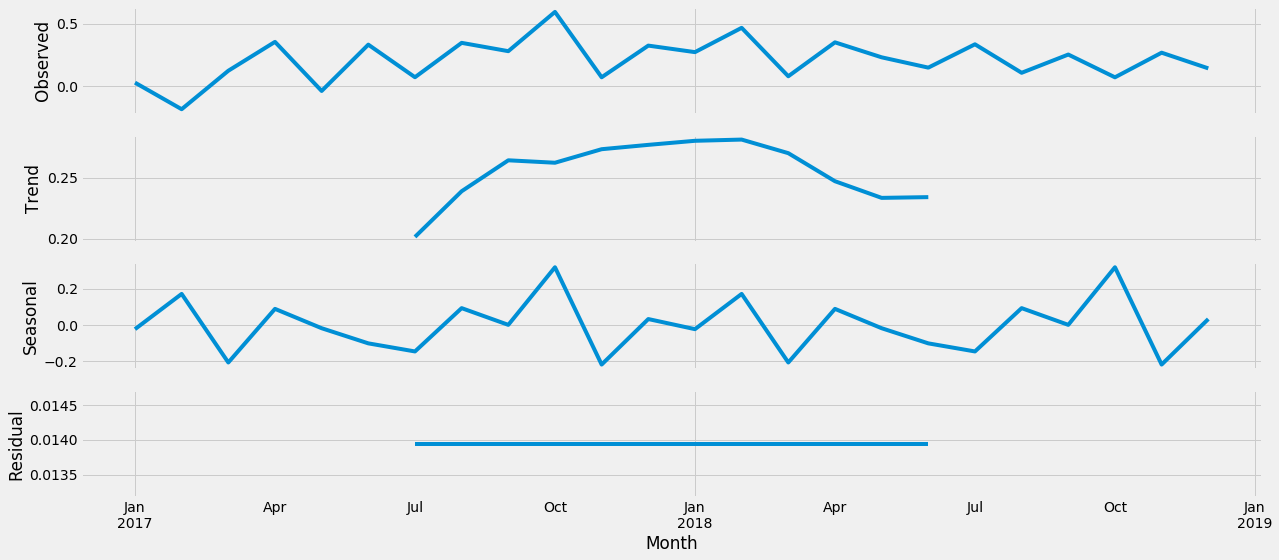

In [175]:
rcParams['figure.figsize'] = 18, 8
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(simplelog_minus_mvavg)
fig = decomposition.plot()

###  autoregression model Application on simple sales data

In [297]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [343]:
x_ar_simple = sales.values
train_simple = x_ar_simple[0:27]
test_simple = x_ar_simple[27:]


In [356]:
model_ar = AR(train_simple)
model_ar_fit = model_ar.fit()
predict_simple = model_ar_fit.predict(start = 27, end = 35)

9.193932045571165
<class 'numpy.ndarray'>


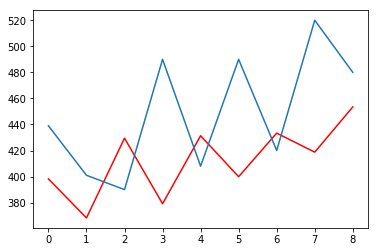

In [357]:
print(model_ar_fit.aic)
print(type(predict_simple))
plt.plot(predict, 'r')
plt.plot(test_simple)

In [340]:
mean_squared_error(test_simple,predictions)

197840.10780704388

## ar model to logminusmv

In [185]:
x_ar_diff = simplelog_minus_mvavg.values
# print(len(x_ar_diff))
train_diff = x_ar_diff[0:24]
test_diff = x_ar_diff[9:]
len(test_diff)

15

In [188]:
model_ar = AR(train_diff)
model_ar_fit = model_ar.fit()
predict = model_ar_fit.predict(start = 10, end = 24)
len(predict)

15

In [189]:
perdiction = []
for i in predict:
    perdiction.append(i)
len(perdiction)

15

In [190]:
lists = []
for i in perdiction:
    lists.append(i)
len(lists)

15

In [192]:
# x_ar_diff[9:]
ndf = pd.DataFrame(x_ar_diff[9:])
ndf

,0
0,0.594444
1,0.070127
2,0.324075
3,0.271810
4,0.466645
5,0.078297
6,0.350332
7,0.230218
8,0.147490
9,0.334600


-4.033332916268863


[]

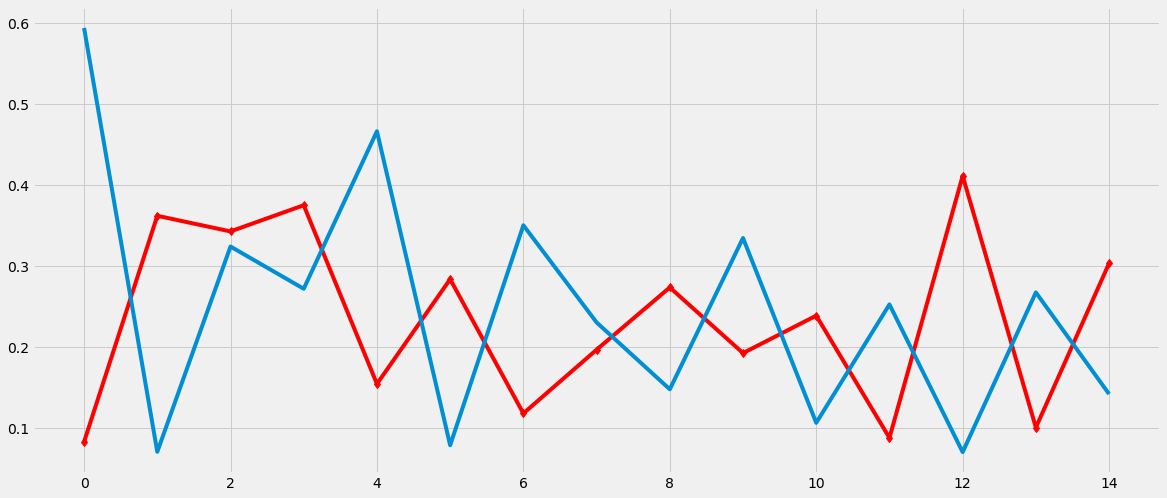

In [193]:
print(model_ar_fit.aic)
plt.plot(predict, 'rd-')
plt.plot(test_diff)
plt.plot()

In [195]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train_diff,order=(9, 2, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [ ]:
predictions= model_arima_fit.forecast(steps=10)[0]
predictions

In [ ]:
plt.plot(test_diff)
plt.plot(predictions,color='red')

### autoregression model Application on diff of sales data

In [176]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [586]:
x_ar_diff = sales_diff1.values
train_diff = x_ar_diff[0:36]
test_diff = x_ar_diff[9:]
len(test_diff)

26

In [587]:

model_ar = AR(train_diff)
model_ar_fit = model_ar.fit()
predict = model_ar_fit.predict(start = 11, end = 36)
len(predict)
# prediction.append(predict)

26

In [589]:
perdiction = []
for i in predict:
    perdiction.append(i)
len(perdiction)

26

In [546]:
lists = []
for i in range(8):
        lists.append(sales.Sales[i])
#         sales['perdiction'] = sales.Sales[i]
#     else:
#         print(prediction[i-8])
# sales.drop(perdiction, inplace = True)
# sales

In [547]:
list1 = []
for i in perdiction:
        list1.append(i)
lists = lists+list1
len(lists)

36

In [597]:
lists = []
for i in perdiction:
    lists.append(i)
len(lists)

26

In [607]:
# x_ar_diff[9:]
ndf = pd.DataFrame(x_ar_diff[9:])
ndf

,0
0,214.0
1,-151.0
2,8.0
3,-44.0
4,60.0
5,63.0
6,-82.0
7,96.0
8,-61.0
9,78.0


In [598]:
# ndf = pd.series(test_diff)
ndf = pd.series(x_ar_diff[9:])
ndf.set_index('Month').head()
ndf.shape
ndf['perdiction'] = lists
# ndf.head()
ndf.plot()
# ndf['prediction'] = lists

AttributeError: 'numpy.ndarray' object has no attribute 'set_index'

8.262627990490525


[]

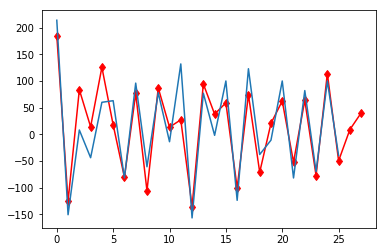

In [583]:
print(model_ar_fit.aic)
plt.plot(predict, 'rd-')
plt.plot(test_diff)
plt.plot()

### Arima model application Simple data 

In [194]:
from statsmodels.tsa.arima_model import ARIMA

In [316]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train_simple,order=(9, 2, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)


297.1619840975368


In [317]:
predictions= model_arima_fit.forecast(steps=10)[0]
predictions

array([396.05473265, 355.95234169, 413.11102326, 374.51868273,
       446.96326133, 378.64235997, 406.40903555, 411.41383596,
       475.92975243, 415.42188732])

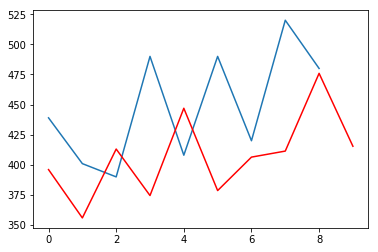

In [318]:
plt.plot(test_simple)
plt.plot(predictions,color='red')

In [322]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))


In [332]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train_simple,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.72448093894775
(0, 0, 2) 315.25060028728575
(0, 0, 3) nan
(0, 0, 4) 310.1669328576465
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.08415381062906
(0, 1, 2) 296.322922690801
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.10194741083694
(1, 0, 0) 316.16687175281163
(1, 0, 1) 313.04871745241866
(1, 0, 2) 310.97906422366304
(1, 0, 4) nan
(1, 1, 0) 298.8325442270784
(1, 1, 1) 297.1256511258498
(1, 1, 2) 299.4716667063481
(1, 1, 3) 301.2851180947781
(1, 1, 4) 299.978732397109
(1, 2, 0) 306.53077675711666
(1, 2, 3) nan
(2, 0, 0) 310.996957362129
(2, 0, 1) 340.1244967391351
(2, 0, 4) 341.428847585567
(2, 1, 0) 300.20895612399585
(2, 1, 1) 297.99999301673483
(2, 1, 2) 298.55054281302364
(2, 1, 3) 302.8720847853808
(2, 2, 0) 306.297585643219
(2, 2, 3) nan
(3, 0, 0) 312.9838587441584
(3, 0, 1) 336.20638633467416
(3, 0, 4) nan
(3, 1, 0) 294.85435842189526
(3, 1, 1) 295.99793534185784
(3, 1, 2) 292.6686238694238
(3, 1, 3) 294.6588907516449
(3, 2, 0) 299.4075868155

### Arima model application diff data 

In [323]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train_diff,order=(9, 2, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)


301.8624856916061


In [327]:
predictions= model_arima_fit.forecast(steps=9)[0]


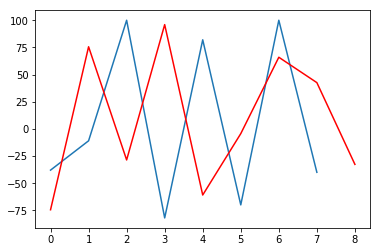

In [329]:
plt.plot(test_diff)
plt.plot(predictions,color='red')

In [331]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train_diff,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 324.39820432750815
(0, 0, 1) 308.0082182897029
(0, 0, 2) 306.8574915860776
(0, 1, 0) 343.4127008785868
(0, 1, 1) 318.2411240271365
(0, 2, 0) 362.1275778032357
(0, 2, 1) 336.596562766636
(1, 0, 0) 309.18956335855603
(1, 0, 1) 306.858942618171
(1, 0, 2) 306.99199323658434
(1, 0, 3) 311.96210604623957
(1, 0, 4) 309.256618934358
(1, 1, 0) 317.87726394170403
(1, 1, 1) 304.361056332431
(1, 1, 2) 299.61348009360023
(1, 1, 3) nan
(1, 1, 4) nan
(1, 2, 0) 329.7824543359751
(2, 0, 0) 310.54360833053363
(2, 0, 1) 308.7289296304592
(2, 0, 4) 311.32916564579875
(2, 1, 0) 317.29615611426937
(2, 1, 1) 305.773624107844
(2, 1, 3) nan
(2, 2, 0) 326.96547253700703
(3, 0, 0) 305.3298372236758
(3, 0, 1) 306.5957237017832
(3, 0, 2) 303.5404472705742
(3, 0, 3) 305.35170903257665
(3, 0, 4) 307.1475363958452
(3, 1, 0) 309.8732180733889
(3, 1, 1) 300.2538550939633
(3, 1, 2) 303.82420325902694
(3, 1, 3) 298.9622496189137
(3, 1, 4) 300.8621712904068
(3, 2, 0) 319.48984436857234
(3, 2, 1) 306.936666948606